In [ ]:
import pandas as pd

# Load the dataset to examine its structure
file_path = '/content/credit_risk_dataset.csv'
data = pd.read_csv(file_path)

# Show the first few rows to understand its structure
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
# Data Understanding and Preprocessing Step-by-Step

# Checking column data types, missing values, and unique values
data_info = data.info()
missing_values = data.isnull().sum()
unique_values = data.nunique()

# Checking distribution of the target variable (loan_status)
target_distribution = data['loan_status'].value_counts(normalize=True)

# Handle Missing Data
# first view the columns with missing data and their proportion of missingness
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

# Dropping rows with missing values or columns with a high proportion of missing data
# (For this example, let's assume we drop rows with any missing values)
cleaned_data = data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
# Feature Engineering

# Standardize or normalize numerical columns: person_age, person_income, loan_amnt
from sklearn.preprocessing import StandardScaler

numerical_features = ['person_age', 'person_income', 'loan_amnt', 'person_emp_length', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
scaler = StandardScaler()
cleaned_data[numerical_features] = scaler.fit_transform(cleaned_data[numerical_features])

# Convert categorical columns into numerical using One-Hot Encoding
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
cleaned_data = pd.get_dummies(cleaned_data, columns=categorical_features, drop_first=True)

# Correlation Analysis
correlation_matrix = cleaned_data.corr()

<ipython-input-4-e074cbc0a8ef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[numerical_features] = scaler.fit_transform(cleaned_data[numerical_features])


In [ ]:

# Output the results of data understanding and preprocessing
data_info

In [ ]:
missing_values

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
unique_values

,0
person_age,58
person_income,4295
person_home_ownership,4
person_emp_length,36
loan_intent,6
loan_grade,7
loan_amnt,753
loan_int_rate,348
loan_status,2
loan_percent_income,77


In [ ]:
target_distribution

,proportion
loan_status,
0,0.781836
1,0.218164


In [ ]:
missing_values_percentage

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


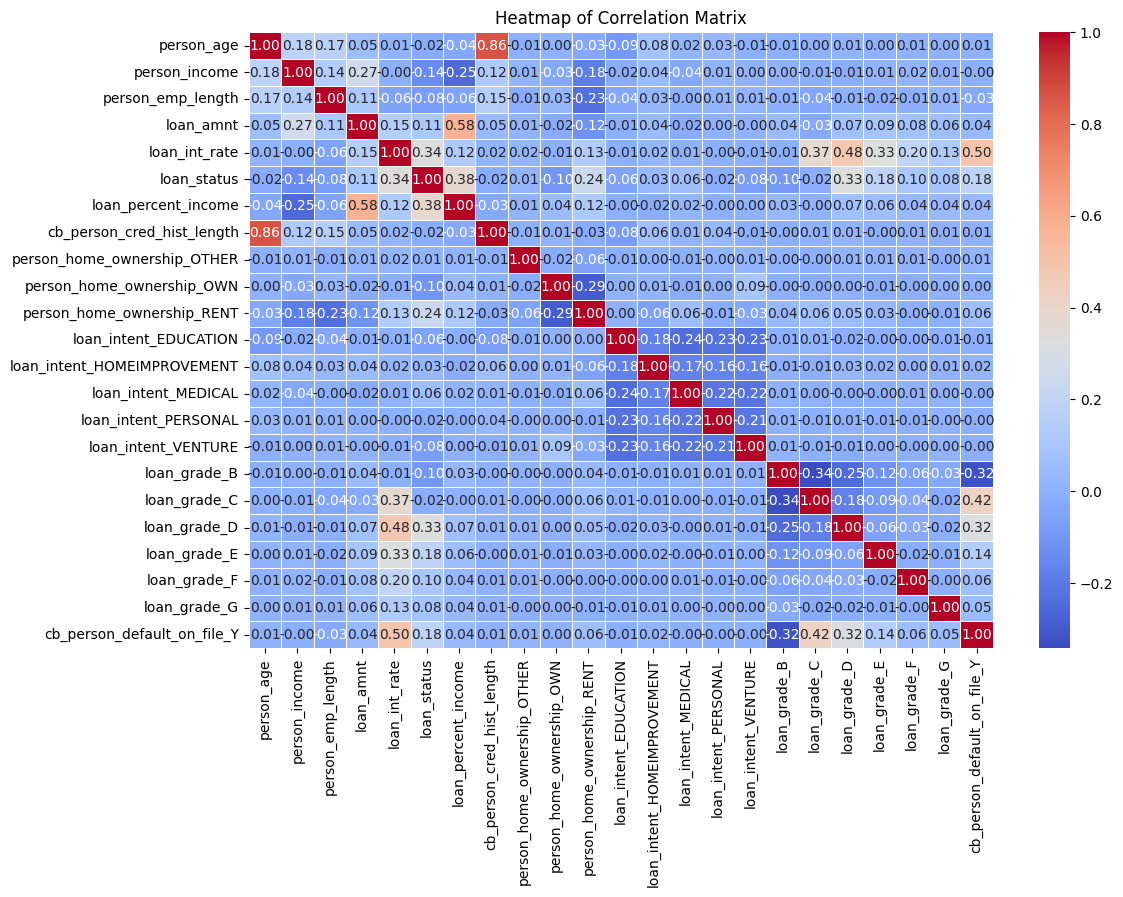

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()


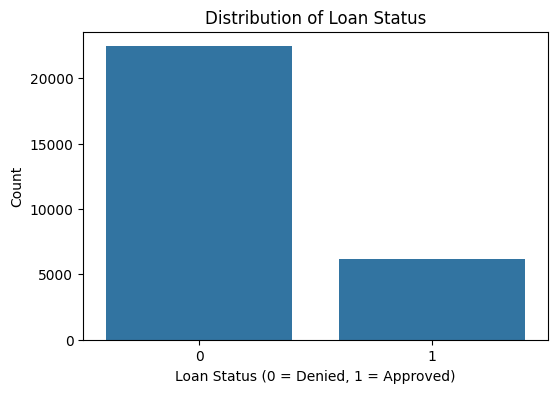

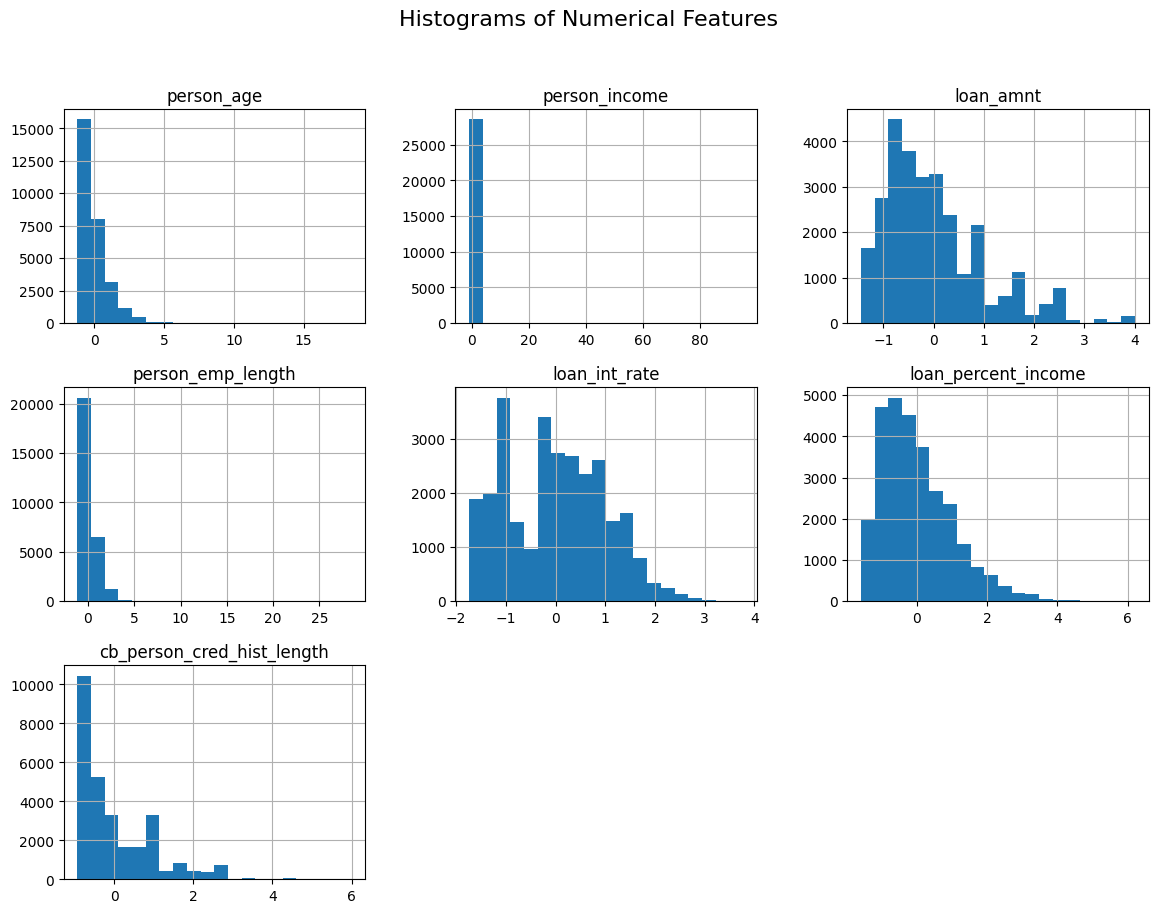

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

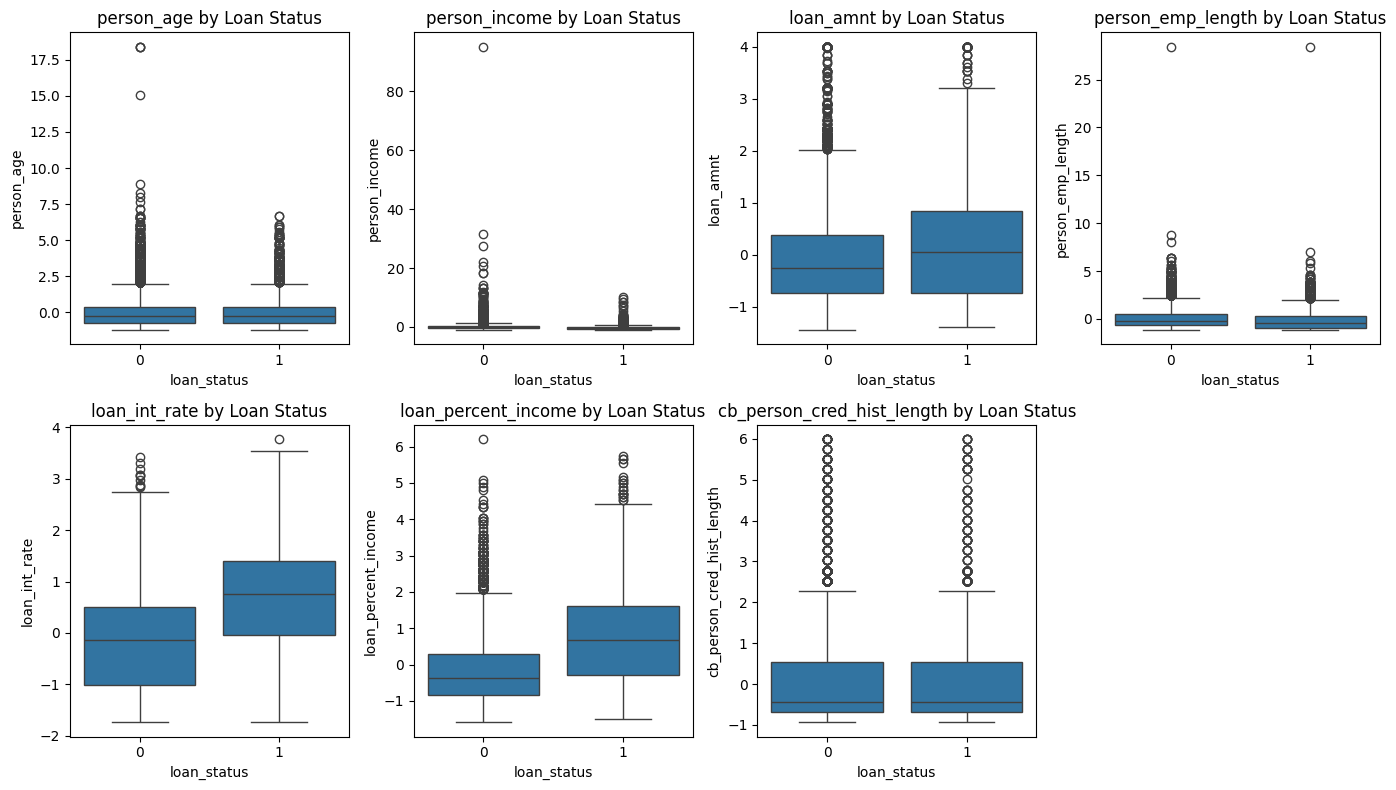

In [ ]:
# Visualize distribution of loan_status
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=cleaned_data)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0 = Denied, 1 = Approved)')
plt.ylabel('Count')
plt.show()

# Histograms of Numerical Features
cleaned_data[numerical_features].hist(bins=20, figsize=(14, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

# Boxplots of Numerical Features by Loan Status
plt.figure(figsize=(14, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='loan_status', y=feature, data=cleaned_data)
    plt.title(f'{feature} by Loan Status')

plt.tight_layout()
plt.show()

In [ ]:
# Import necessary libraries for model selection and splitting the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Define the features (X) and the target (y)
X = cleaned_data.drop('loan_status', axis=1)
y = cleaned_data['loan_status']

# Step 2: Split the data into training and testing sets, with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = log_reg.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
accuracy


0.8601606145251397

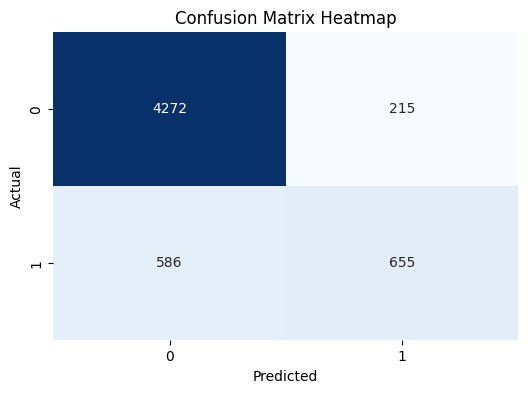

In [ ]:
# Generate a heatmap for the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create a table for the classification report
import pandas as pd

# Convert classification report to dictionary format and then to a DataFrame
report_dict = classification_report(y_test, y_pred, output_dict=True)
classification_report_df = pd.DataFrame(report_dict).transpose()

In [ ]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.88      0.95      0.91      4487\n           1       0.75      0.53      0.62      1241\n\n    accuracy                           0.86      5728\n   macro avg       0.82      0.74      0.77      5728\nweighted avg       0.85      0.86      0.85      5728\n'

In [ ]:
# Import necessary libraries for Decision Tree and Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Step 1: Decision Tree Model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

# Step 2: Random Forest Model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)

# Step 3: Evaluate Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)

# Step 4: Evaluate Random Forest
accuracy_forest = accuracy_score(y_test, y_pred_forest)
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
class_report_forest = classification_report(y_test, y_pred_forest)

{'Decision Tree': {'accuracy': 0.8804120111731844,
  'confusion_matrix': array([[4126,  361],
         [ 324,  917]]),
  'classification_report': '              precision    recall  f1-score   support\n\n           0       0.93      0.92      0.92      4487\n           1       0.72      0.74      0.73      1241\n\n    accuracy                           0.88      5728\n   macro avg       0.82      0.83      0.83      5728\nweighted avg       0.88      0.88      0.88      5728\n'},
 'Random Forest': {'accuracy': 0.9282472067039106,
  'confusion_matrix': array([[4445,   42],
         [ 369,  872]]),
  'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.99      0.96      4487\n           1       0.95      0.70      0.81      1241\n\n    accuracy                           0.93      5728\n   macro avg       0.94      0.85      0.88      5728\nweighted avg       0.93      0.93      0.92      5728\n'}}

Text(120.72222222222221, 0.5, 'Actual')

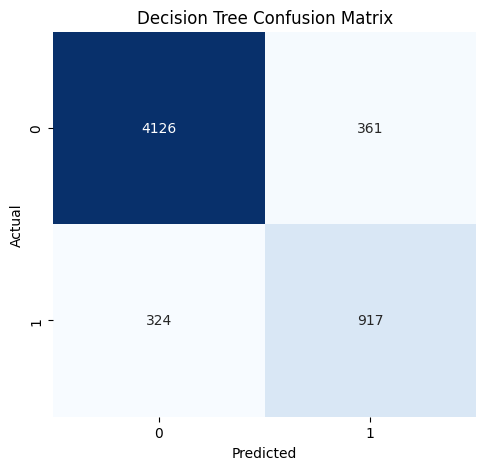

In [ ]:
# Generate heatmaps for confusion matrices
plt.figure(figsize=(12,5))

# Confusion matrix for Decision Tree
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

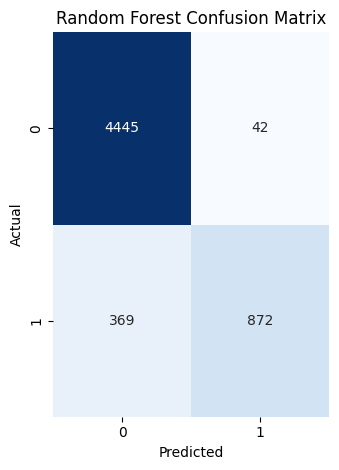

In [ ]:
# Confusion matrix for Random Forest
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

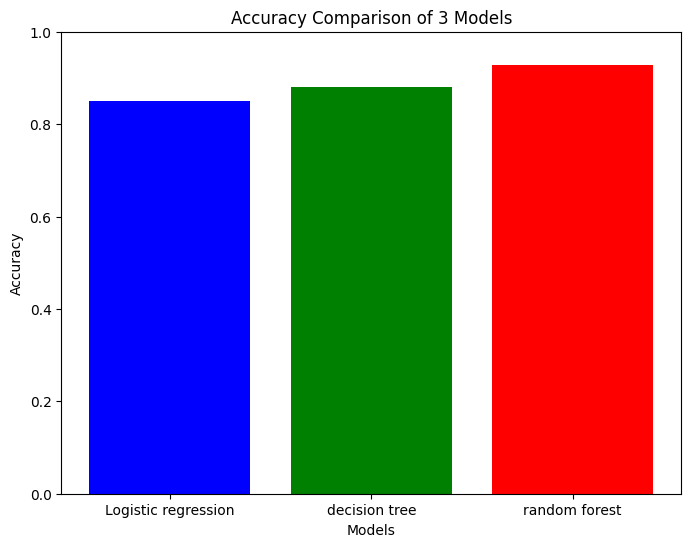

In [1]:
import matplotlib.pyplot as plt

# Accuracy data for the three models
model_names = ['Logistic regression', 'decision tree', 'random forest']
accuracies = [0.85, 0.88, 0.928]

# Create a bar chart to compare the accuracies
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])

# Add title and labels
plt.title('Accuracy Comparison of 3 Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Display the plot
plt.ylim(0, 1)  # Set y-axis limit to 1 (for accuracy percentage)
plt.show()
